## Hoja de Trabajo 2 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo

------------

## Ejercicio 2 - Preguntas Prácticas

### Ejercicio 2.1

Usted es el gerente de una fábrica que produce dos tipos de productos: A y B. La fábrica tiene recursos limitados,
incluidas las horas de trabajo y las materias primas. Su objetivo es maximizar las ganancias mientras satisface la
demanda de ambos productos.


Para eso usted recolecta los siguientes datos:
- El producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad.
- El producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.
- Tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles.
- La ganancia del producto A es de $10 por unidad y la del producto B es de $15 por unidad.

Usted sabe que la función que desea maximizar es la de la ganancia (10x+15y, donde x=producto A, y = producto B)

Responda:

1. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- La fábrica tiene recursos limitados, incluidas las horas de trabajo y las materias primas.
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ Restricción Mano de Obra: 2x+4y≤100 $$

$$ Restricción Materia Prima: 3x+2y≤120 $$

$$ Restricción No Negatividad: x≥0, y≥0 $$


2. **Usando programación lineal, determine cuántas unidades de cada producto se deben producir para maximizar la ganancia y cumplir con las restricciones de recursos.**
- Escriba un script en Python o en otro lenguaje de programación de su preferencia

Referencia:
- https://towardsdatascience.com/basic-linear-programming-in-python-with-pulp-d398d144802b

In [7]:
from pulp import *
pulp.LpSolverDefault.msg = 0

# Crear el problema
prob = LpProblem("HDT2-2.1", LpMaximize)

# Variables de decisión
x = LpVariable("x", 0)  # Cantidad de producto A
y = LpVariable("y", 0)  # Cantidad de producto B

# Función objetivo
prob += 10*x + 15*y, "Ganancia"

# Restricciones
prob += 2*x + 4*y <= 100, "Restricción Mano de Obra"
prob += 3*x + 2*y <= 120, "Restricción Materiales"
prob += x >= 0,           "Restricción No Negatividad A"
prob += y >= 0,           "Restricción No Negatividad B"

# Resolver el problema
prob.solve()

# Imprimir los resultados
print("Cantidad de producto A a producir:", value(x))
print("Cantidad de producto B a producir:", value(y))
print("Ganancia máxima:", value(prob.objective))


Cantidad de producto A a producir: 35.0
Cantidad de producto B a producir: 7.5
Ganancia máxima: 462.5


3. **Interprete el resultado**

El 

4. **Muestre una gráfica del feasible area mostrando el punto donde está su respuesta**

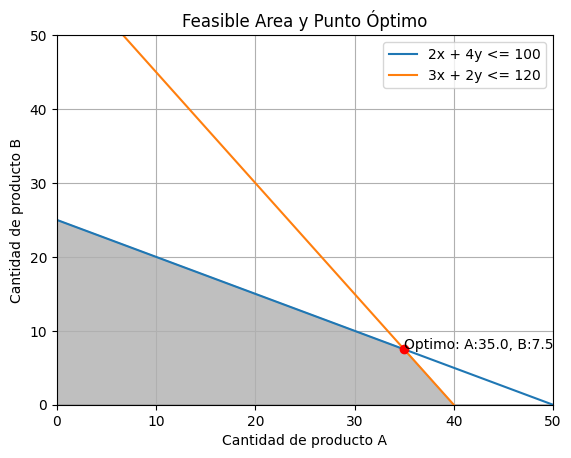

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Restricciones 
x_values = np.linspace(0, 100, 100)
y_labor = (100 - 2*x_values) / 4
y_material = (120 - 3*x_values) / 2

# Graficar las restricciones
plt.plot(x_values, y_labor, label='2x + 4y <= 100')
plt.plot(x_values, y_material, label='3x + 2y <= 120')

# Punto de optimización
plt.plot(value(x), value(y), 'ro')
plt.annotate(f'Optimo: A:{value(x)}, B:{value(y)}', (value(x), value(y)))

# Etiquetas y leyenda
plt.xlabel('Cantidad de producto A')
plt.ylabel('Cantidad de producto B')
plt.title('Feasible Area y Punto Óptimo')
plt.legend()

# Limites de los ejes
plt.xlim(0, 50)
plt.ylim(0, 50)

# Pintar feasible area
x_feasible = np.linspace(0, 100, 100)
y_feasible = np.minimum(y_labor, y_material)
plt.fill_between(x_feasible, y_feasible, color='grey', alpha=0.5)

# Mostrar la gráfica
plt.grid()
plt.show()
